# Credit Card Dataset

In [82]:
import pandas as pd
import numpy as np
CreditData = pd.read_excel("C:/Users/Priya Patle/Desktop/Class/Python/Domain Related Project/Credit_card/default of credit card clients.xls")
print("Shape before removing duplicates",CreditData.shape)
CreditData =CreditData.drop_duplicates()
print("Shape after dropping duplicates",CreditData.shape)
CreditData.head()

Shape before removing duplicates (30000, 25)
Shape after dropping duplicates (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
CreditData.MARRIAGE.unique()
CreditData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Defining Problem Statement
* Target - Default Payment Next Month
* Predictors - Limit_Bal, sex ,etc

# Distribution of Target Variable

<AxesSubplot:xlabel='default payment next month'>

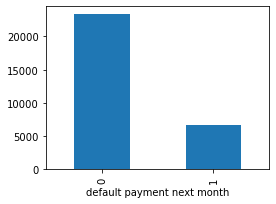

In [84]:
%matplotlib inline
GroupedData = CreditData.groupby('default payment next month').size()
GroupedData.plot(kind='bar',figsize=(4,3))

# Basic Data Exploration

In [85]:
CreditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [86]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [87]:
CreditData.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,7,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,University,Single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [88]:
CreditData.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# Basic Data Exploration

In [89]:
UselessColumns = ['ID']
CreditData = CreditData.drop(UselessColumns,axis=1)

In [90]:
CreditData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [91]:
CreditData.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

# Visual Data Exploration

## Categorical Data- Bar Plots

In [92]:
def PlotBarCharts(inpData, Colstoplot):
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    fig, subPlot = plt.subplots(nrows=1, ncols=len(Colstoplot), figsize=(20,5))
    fig.suptitle('Bar charts of'+str(Colstoplot))
    
    for colName, plotNumber in zip(Colstoplot, range(len(Colstoplot))):
        inpData.groupby(colName).size().plot(kind='bar', ax= subPlot[plotNumber])

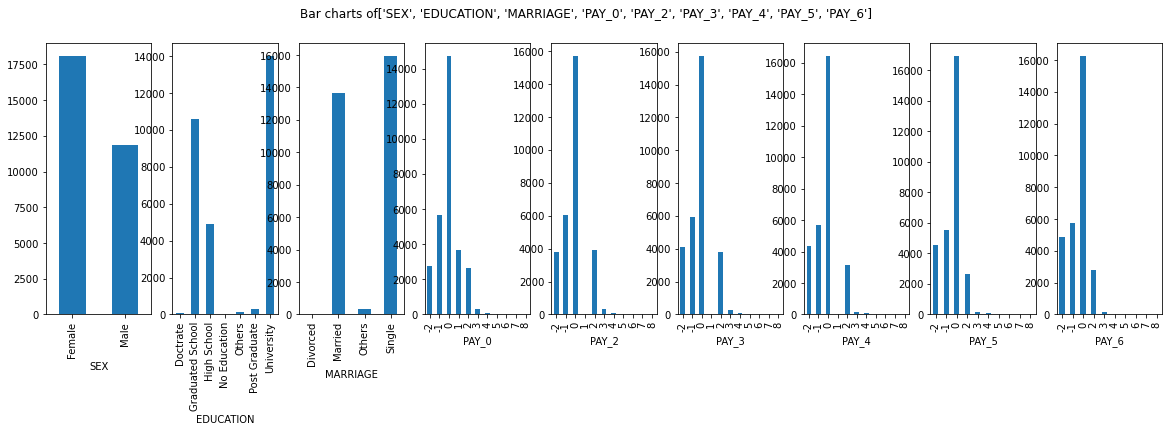

In [93]:
PlotBarCharts(inpData=CreditData, Colstoplot=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

In [94]:
CreditData['PAY_0'][CreditData['PAY_0']>=3]=3
CreditData['PAY_2'][CreditData['PAY_2']>=3]=3
CreditData['PAY_3'][CreditData['PAY_3']>=3]=3
CreditData['PAY_4'][CreditData['PAY_4']>=3]=3
CreditData['PAY_5'][CreditData['PAY_5']>=3]=3
CreditData['PAY_6'][CreditData['PAY_6']>=3]=3

<ipython-input-94-4aa987a20c1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['PAY_0'][CreditData['PAY_0']>=3]=3
<ipython-input-94-4aa987a20c1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['PAY_2'][CreditData['PAY_2']>=3]=3
<ipython-input-94-4aa987a20c1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['PAY_3'][CreditData['PAY_3']>=3]=3
<ipython-input-94-4aa987a20c1c>:4: SettingWithCopyWarning:

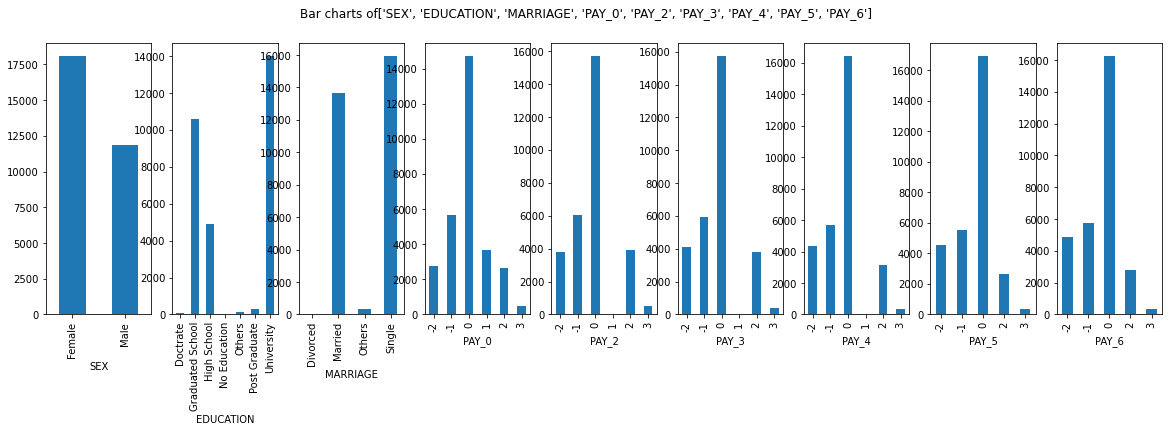

In [95]:
PlotBarCharts(inpData=CreditData, Colstoplot=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])

## Continous Data - Histogram

In [96]:
CreditData.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                             6
PAY_2                             6
PAY_3                             6
PAY_4                             6
PAY_5                             5
PAY_6                             5
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

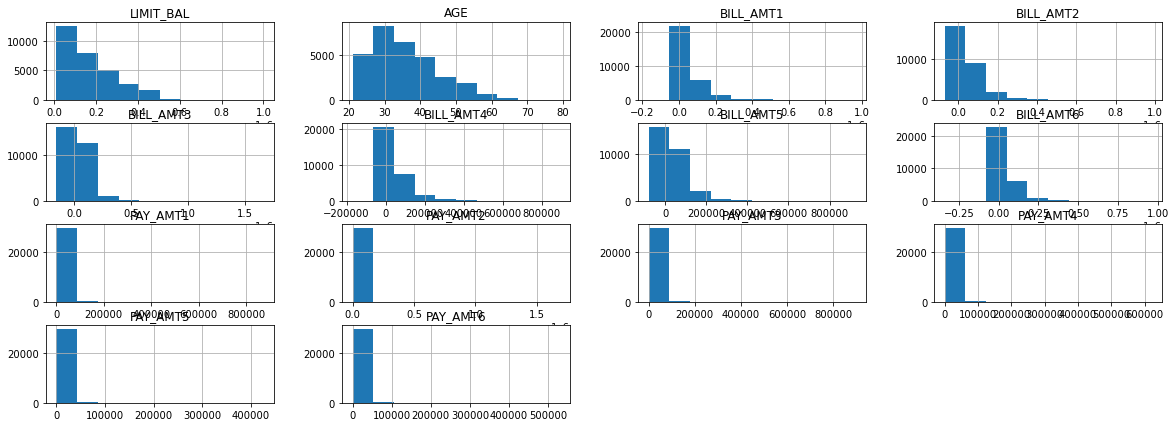

In [97]:
CreditData.hist(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
           'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], figsize=(20,7))

# Outlier Treatment

In [98]:
CreditData['BILL_AMT1'][CreditData['BILL_AMT1']>200000].sort_values(ascending=False)
CreditData['BILL_AMT1'][CreditData['BILL_AMT1']>200000]=200239
CreditData['BILL_AMT2'][CreditData['BILL_AMT2']>200000].sort_values(ascending=False)
CreditData['BILL_AMT2'][CreditData['BILL_AMT2']>200000]=200055
CreditData['BILL_AMT3'][CreditData['BILL_AMT3']>500000].sort_values(ascending=False)
CreditData['BILL_AMT3'][CreditData['BILL_AMT3']>500000]=517746
CreditData['BILL_AMT4'][CreditData['BILL_AMT4']>200000].sort_values(ascending=False)
CreditData['BILL_AMT4'][CreditData['BILL_AMT4']>200000]=200081
CreditData['BILL_AMT5'][CreditData['BILL_AMT5']>200000].sort_values(ascending=False)
CreditData['BILL_AMT5'][CreditData['BILL_AMT5']>200000]=200117
CreditData['BILL_AMT6'][CreditData['BILL_AMT6']>200000].sort_values(ascending=False)
CreditData['BILL_AMT6'][CreditData['BILL_AMT6']>200000]=200057
CreditData['BILL_AMT1'][CreditData['BILL_AMT1']<-10000].sort_values(ascending=True)
CreditData['BILL_AMT1'][CreditData['BILL_AMT1']<-10000]=-10682
CreditData['BILL_AMT2'][CreditData['BILL_AMT2']<-15000].sort_values(ascending=True)
CreditData['BILL_AMT2'][CreditData['BILL_AMT2']<-15000]=-15910
CreditData['BILL_AMT3'][CreditData['BILL_AMT3']<-1000].sort_values(ascending=True)
CreditData['BILL_AMT3'][CreditData['BILL_AMT3']<-1000]=-1001
CreditData['BILL_AMT4'][CreditData['BILL_AMT4']<-20000].sort_values(ascending=True)
CreditData['BILL_AMT4'][CreditData['BILL_AMT4']<-20000]=-20320
CreditData['BILL_AMT5'][CreditData['BILL_AMT5']<-25000].sort_values(ascending=True)
CreditData['BILL_AMT5'][CreditData['BILL_AMT5']<-25000]=-28325
CreditData['BILL_AMT6'][CreditData['BILL_AMT6']<-10000].sort_values(ascending=True)
CreditData['BILL_AMT6'][CreditData['BILL_AMT6']<-10000]=-10193
CreditData['PAY_AMT1'][CreditData['PAY_AMT1']>10000].sort_values(ascending=False)
CreditData['PAY_AMT1'][CreditData['PAY_AMT1']>10000]=10001
CreditData['PAY_AMT2'][CreditData['PAY_AMT2']>10000].sort_values(ascending=False)
CreditData['PAY_AMT2'][CreditData['PAY_AMT2']>10000]=10001
CreditData['PAY_AMT3'][CreditData['PAY_AMT3']>10000].sort_values(ascending=False)
CreditData['PAY_AMT3'][CreditData['PAY_AMT3']>10000]=10001
CreditData['PAY_AMT4'][CreditData['PAY_AMT4']>5000].sort_values(ascending=False)
CreditData['PAY_AMT4'][CreditData['PAY_AMT4']>5000]=5001
CreditData['PAY_AMT5'][CreditData['PAY_AMT5']>6000].sort_values(ascending=False)
CreditData['PAY_AMT5'][CreditData['PAY_AMT5']>6000]=6001
CreditData['PAY_AMT6'][CreditData['PAY_AMT6']>10000].sort_values(ascending=False)
CreditData['PAY_AMT6'][CreditData['PAY_AMT6']>10000]=10001

<ipython-input-98-150a15500490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['BILL_AMT1'][CreditData['BILL_AMT1']>200000]=200239
<ipython-input-98-150a15500490>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['BILL_AMT2'][CreditData['BILL_AMT2']>200000]=200055
<ipython-input-98-150a15500490>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CreditData['BILL_AMT3'][CreditData['BILL_AMT3']>500000]=517746
<ipytho

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>],
       [<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

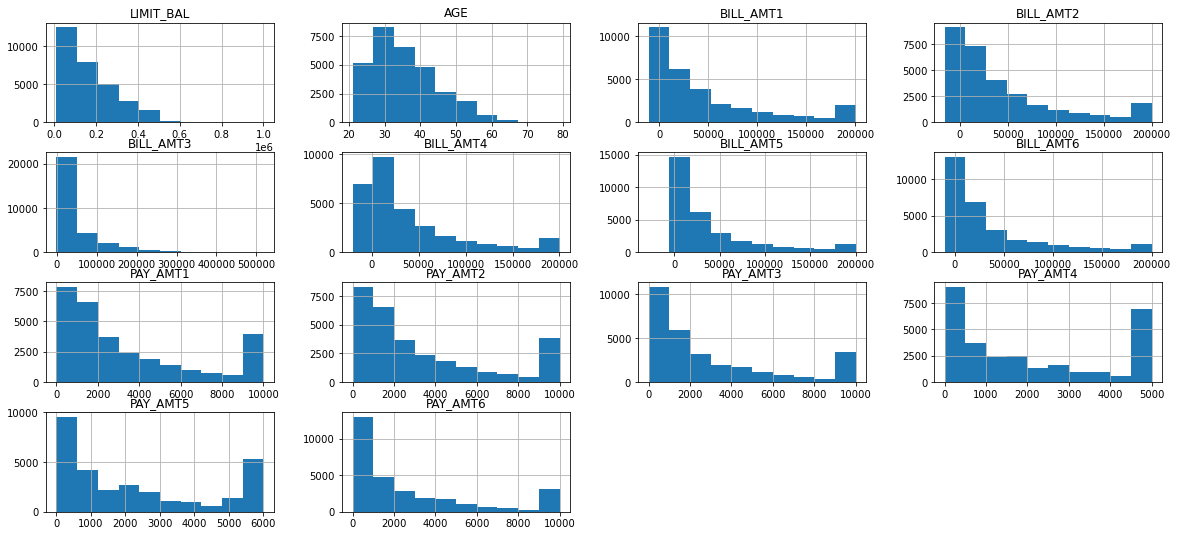

In [99]:
CreditData.hist(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3',
           'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], figsize=(20,9))

# Missing Values Treatment

In [100]:
CreditData.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Feature Selection

## Categorical vs Continuous-- Box Plots

In [101]:
CreditData.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                             6
PAY_2                             6
PAY_3                             6
PAY_4                             6
PAY_5                             5
PAY_6                             5
BILL_AMT1                     21204
BILL_AMT2                     20949
BILL_AMT3                     21873
BILL_AMT4                     20522
BILL_AMT5                     20131
BILL_AMT6                     19753
PAY_AMT1                       5561
PAY_AMT2                       5456
PAY_AMT3                       5348
PAY_AMT4                       3613
PAY_AMT5                       4028
PAY_AMT6                       4985
default payment next month        2
dtype: int64

In [102]:
CreditData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

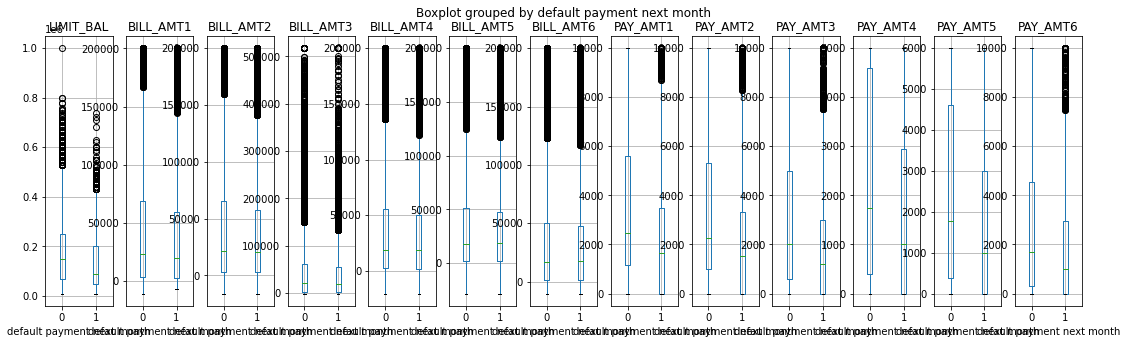

In [103]:
ContinuousColsList = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditData.boxplot(column=PredictorCol, by='default payment next month', figsize=(10,10), vert=True, ax=PlotCanvas[i])

## Statistical Feature Selection - Cat vs Cont.

In [104]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [105]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
FunctionAnova(inpData=CreditData, TargetVariable='default payment next month', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

LIMIT_BAL is correlated with default payment next month | P-Value: 1.3022439532706416e-157
BILL_AMT1 is correlated with default payment next month | P-Value: 1.0439133973563017e-06
BILL_AMT2 is correlated with default payment next month | P-Value: 0.0001481430009606791
BILL_AMT3 is correlated with default payment next month | P-Value: 0.017032940180715866
BILL_AMT4 is correlated with default payment next month | P-Value: 0.00931961801798286
BILL_AMT5 is correlated with default payment next month | P-Value: 0.041525368596504485
BILL_AMT6 is NOT correlated with default payment next month | P-Value: 0.17264857105100453
PAY_AMT1 is correlated with default payment next month | P-Value: 1.0409851268087172e-141
PAY_AMT2 is correlated with default payment next month | P-Value: 1.707677350047311e-132
PAY_AMT3 is correlated with default payment next month | P-Value: 1.1973788251410052e-105
PAY_AMT4 is correlated with default payment next month | P-Value: 9.79625860111

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [106]:
CreditData.drop('BILL_AMT6',inplace=True,axis=1)

In [107]:
CreditData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,689,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,...,2682,3272,3455,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,0,0,0,0,0,...,13559,14331,14948,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,0,0,0,0,0,...,49291,28314,28959,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,35835,20940,19146,2000,10001,10000,5001,689,679,0


## Cont vs Cont-Grouped Bar Chart

In [108]:
CreditData.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                             6
PAY_2                             6
PAY_3                             6
PAY_4                             6
PAY_5                             5
PAY_6                             5
BILL_AMT1                     21204
BILL_AMT2                     20949
BILL_AMT3                     21873
BILL_AMT4                     20522
BILL_AMT5                     20131
PAY_AMT1                       5561
PAY_AMT2                       5456
PAY_AMT3                       5348
PAY_AMT4                       3613
PAY_AMT5                       4028
PAY_AMT6                       4985
default payment next month        2
dtype: int64

In [109]:
CreditData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

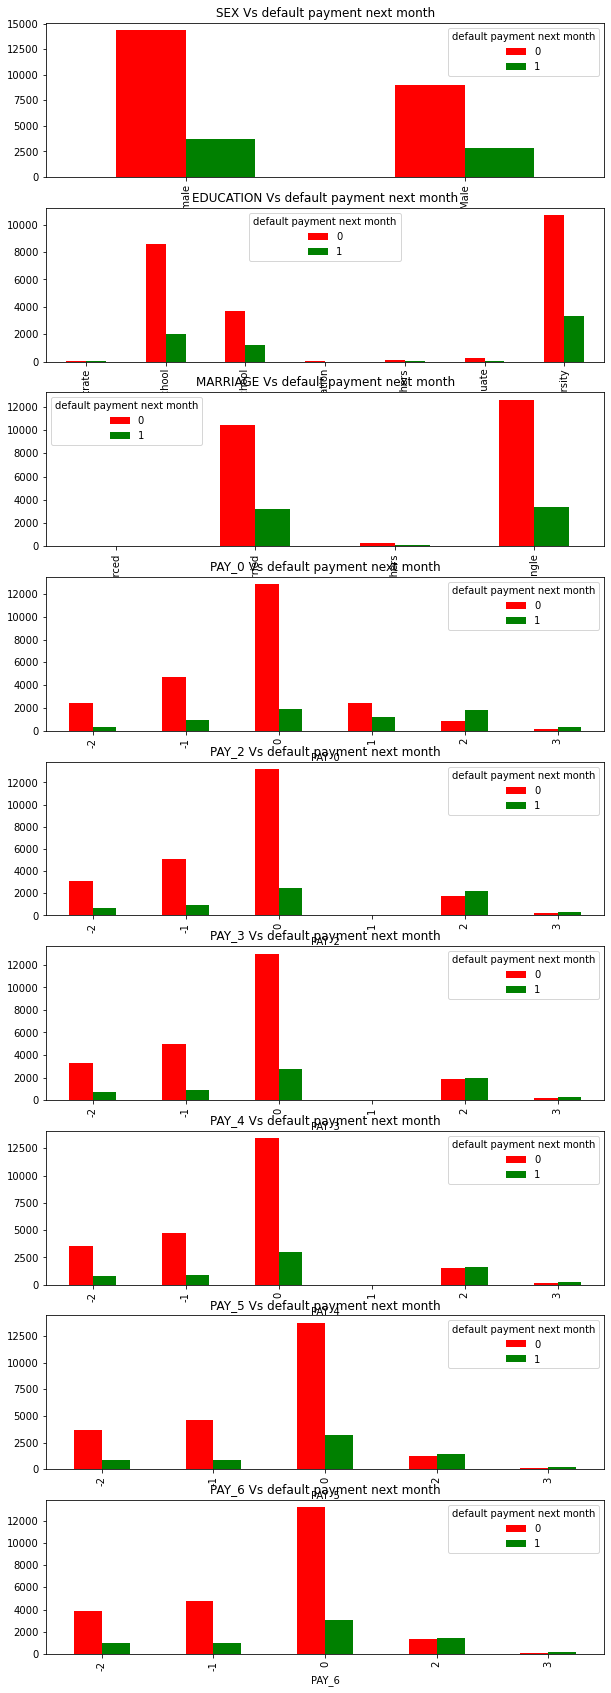

In [110]:
CategoricalColsList=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditData[CategoricalCol], columns=CreditData['default payment next month'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'default payment next month')

## Statistical Feature Selection - Chi Square test

In [111]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [112]:
CategoricalVariables=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Calling the function
FunctionChisq(inpData=CreditData, 
              TargetVariable='default payment next month',
              CategoricalVariablesList= CategoricalVariables)

SEX is correlated with default payment next month | P-Value: 4.944678999412026e-12
EDUCATION is correlated with default payment next month | P-Value: 1.2332626245415605e-32
MARRIAGE is correlated with default payment next month | P-Value: 8.825862457577375e-08
PAY_0 is correlated with default payment next month | P-Value: 0.0
PAY_2 is correlated with default payment next month | P-Value: 0.0
PAY_3 is correlated with default payment next month | P-Value: 0.0
PAY_4 is correlated with default payment next month | P-Value: 0.0
PAY_5 is correlated with default payment next month | P-Value: 0.0
PAY_6 is correlated with default payment next month | P-Value: 0.0


['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

# Selecting Final Predictors

In [113]:
CreditData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [114]:
SelectedColumns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
CreditML = CreditData[SelectedColumns]
CreditML.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,3102,689,0,0,0,689,0,0,0,0
1,120000,Female,University,Single,26,-1,2,0,0,0,...,1725,2682,3272,3455,0,1000,1000,1000,0,2000
2,90000,Female,University,Single,34,0,0,0,0,0,...,14027,13559,14331,14948,1518,1500,1000,1000,1000,5000
3,50000,Female,University,Married,37,0,0,0,0,0,...,48233,49291,28314,28959,2000,2019,1200,1100,1069,1000
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,5670,35835,20940,19146,2000,10001,10000,5001,689,679


In [115]:
CreditML.to_pickle('CreditML.pkl')

In [116]:
CreditML['default payment next month']=CreditData['default payment next month']
CreditML.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,689,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,...,2682,3272,3455,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,0,0,0,0,0,...,13559,14331,14948,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,0,0,0,0,0,...,49291,28314,28959,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,35835,20940,19146,2000,10001,10000,5001,689,679,0


## Data Preprocessing

In [117]:
CreditML['SEX'] = CreditML['SEX'].astype('category')
CreditML['EDUCATION'] = CreditML['EDUCATION'].astype('category')
# CreditML['MARRIAGE'] = CreditML['MARRIAGE'].astype('category')

In [118]:
CreditML['SEX'] = CreditML['SEX'].cat.codes
CreditML['EDUCATION'] = CreditML['EDUCATION'].cat.codes
# CreditML['MARRIAGE'] = CreditML['MARRIAGE'].cat.codes

In [119]:
CreditML = pd.get_dummies(CreditML)

In [120]:
CreditML.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,MARRIAGE_Divorced,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,20000,0,6,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,0,1,0,0
1,120000,0,6,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,0,0,0,1
2,90000,0,6,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,0,6,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,1,0,0
4,50000,1,6,57,-1,0,-1,0,0,0,...,10001,10000,5001,689,679,0,0,1,0,0


# Splitting Data into Train and Test

In [121]:
CreditML.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'MARRIAGE_Divorced', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'],
      dtype='object')

In [128]:
TargetVariable = 'default payment next month'
Predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'MARRIAGE_Divorced', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single']
X = CreditML[Predictors].values
y = CreditML[TargetVariable].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 25)
(9000, 25)
(21000,)
(9000,)


In [130]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 25)
(9000, 25)
(21000,)
(9000,)


## Logistic Regression

In [146]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7040
           1       0.66      0.25      0.37      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000

[[6782 1463]
 [ 258  497]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.76177061 0.76736496 0.77026399 0.76549443 0.77104941 0.79258496
 0.78907132 0.76881802 0.77145064 0.77154013]

Final Average Accuracy of the model: 0.77


## Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

[[6776  264]
 [1351  609]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.78488855 0.78726453 0.7949588  0.78153667 0.79858518 0.8139894
 0.81851852 0.80676193 0.80587571 0.80334505]

Final Average Accuracy of the model: 0.8


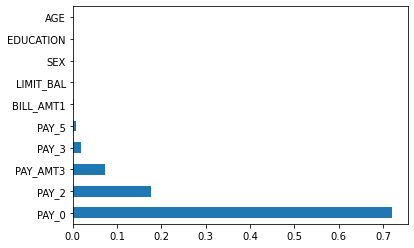

In [177]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting the decision tree

C:\Users\Priya Patle\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


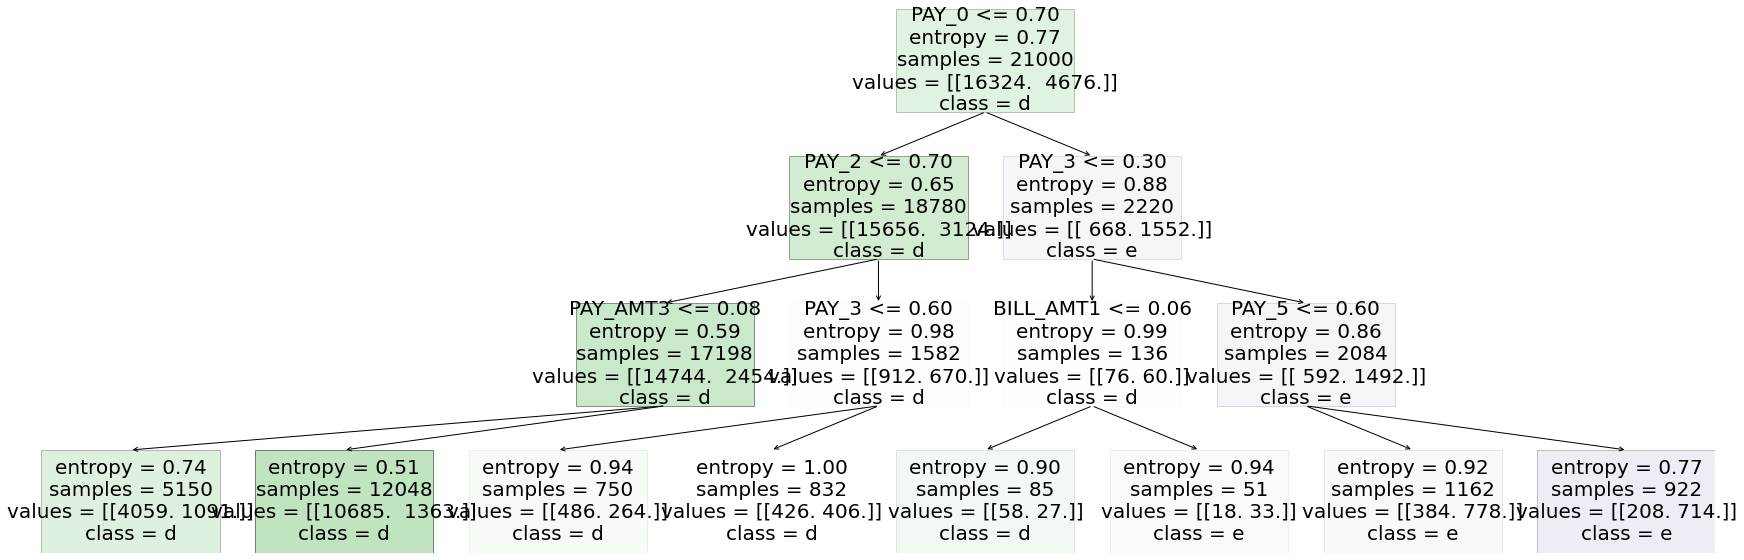

In [179]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in

## Random Forest

RandomForestClassifier(max_depth=5, n_estimators=150)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.34      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000

[[6714  326]
 [1290  670]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.77751748 0.7792366  0.79321518 0.7787149  0.78517415 0.80214114
 0.79946215 0.7966813  0.79231415 0.79353756]

Final Average Accuracy of the model: 0.79


<AxesSubplot:>

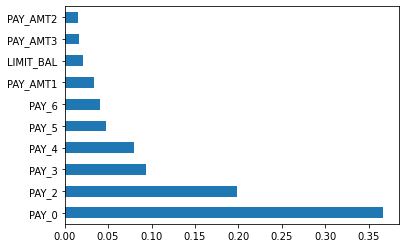

In [194]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=5,n_estimators=150,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Plotting the Decision Tree in Random Forests

C:\Users\Priya Patle\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


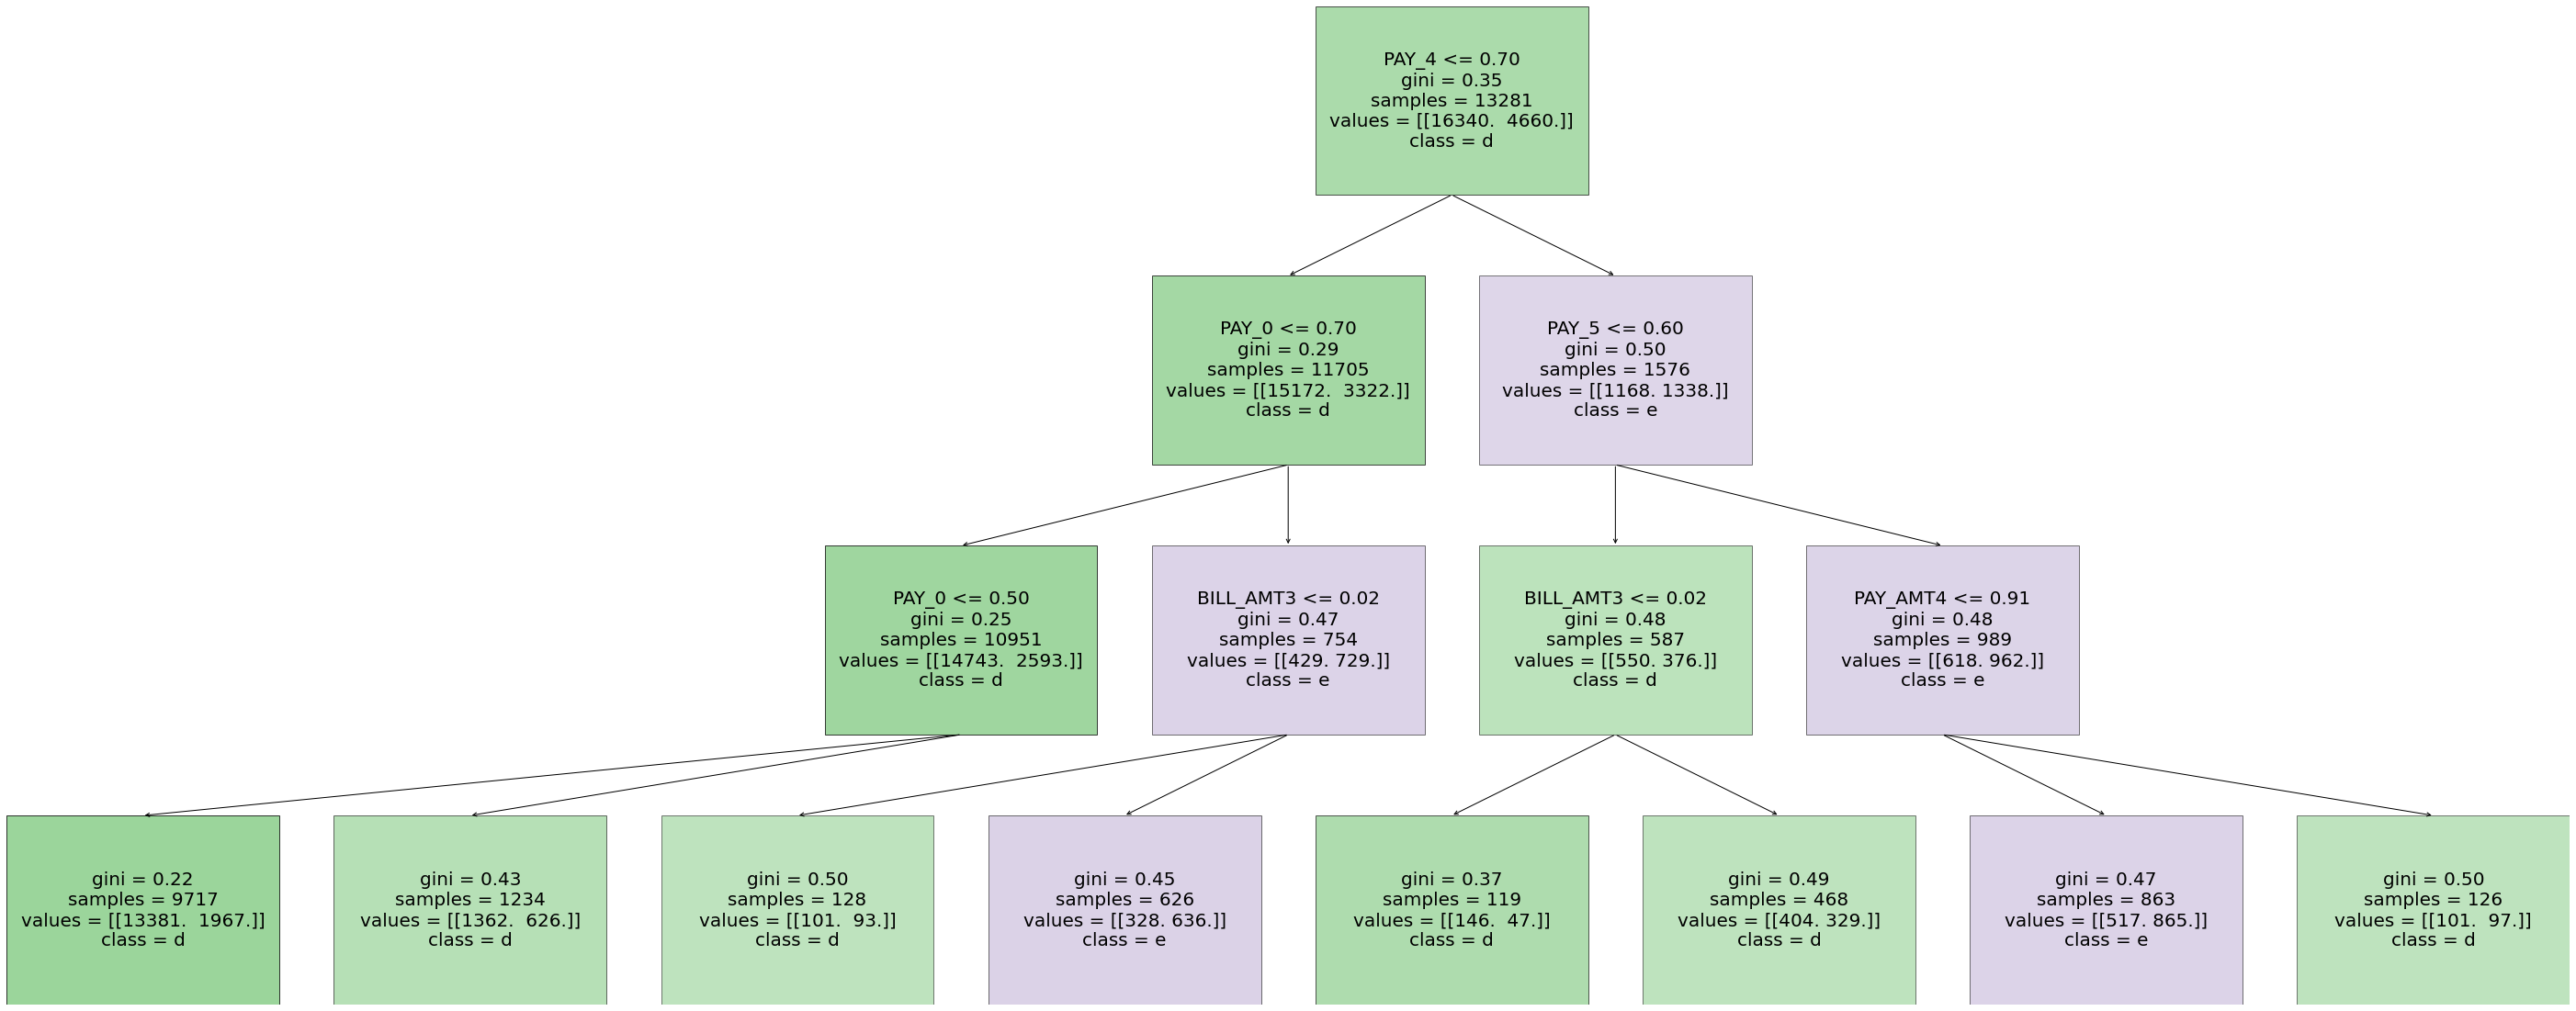

In [170]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## Adaboost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.001, n_estimators=100)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6702  338]
 [1276  684]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.78563417 0.78623458 0.7949588  0.78339731 0.79858518 0.81338812
 0.81867545 0.81061456 0.80587571 0.80334505]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

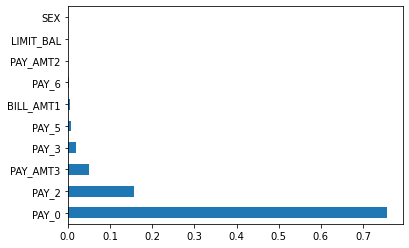

In [199]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.68      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000

[[6728  312]
 [1283  677]]
Accuracy of the model on Testing Sample Data: 0.8


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priya Patle\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy values for 10-fold Cross Validation:
 [0.78192477 0.78356373 0.79425542 0.78071717 0.79877505 0.81249376
 0.81794943 0.80565132 0.80065164 0.80169401]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

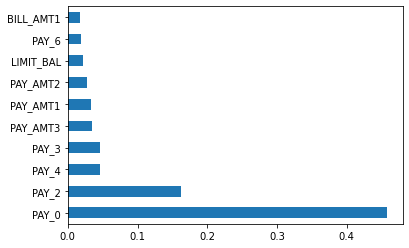

In [202]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## KNN

In [205]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7040
           1       0.52      0.32      0.40      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.62      0.63      9000
weighted avg       0.76      0.79      0.77      9000

[[6469  571]
 [1333  627]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.75311812 0.76121877 0.77374991 0.76328631 0.77283123 0.77793823
 0.79630407 0.77096032 0.77386138 0.77349486]

Final Average Accuracy of the model: 0.77


## SVM

In [206]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7040
           1       0.65      0.26      0.38      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.61      0.63      9000
weighted avg       0.79      0.81      0.78      9000

[[6762  278]
 [1442  518]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.77054184 0.7697629  0.77259364 0.77028487 0.77523538 0.79213135
 0.79502795 0.77960988 0.78673612 0.78431234]

Final Average Accuracy of the model: 0.78


## Naive Bayes

In [206]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7040
           1       0.50      0.49      0.50      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.78      0.78      0.78      9000

[[6061  979]
 [ 992  968]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.76027703 0.7741377  0.78061648 0.7680194  0.78344653 0.7820184
 0.81741902 0.78297475 0.79841879 0.78934119]

Final Average Accuracy of the model: 0.78
